<div style="
    border-left:10px solid #2e7d32;
    padding:10px 14px;color:black; 
    font-size:30px;
    font-weight:800;
    background:#e8f5e9;
">
 Step 1: Read the Image </d>

In [1]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


(np.float64(-0.5), np.float64(671.5), np.float64(426.5), np.float64(-0.5))

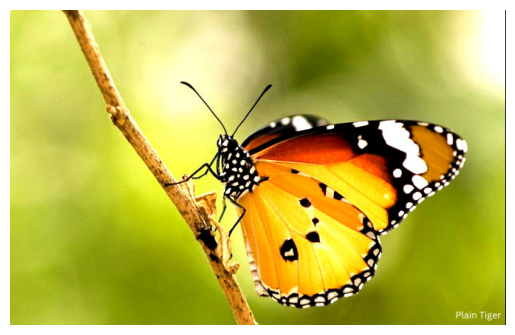

In [5]:
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


img = cv2.imread(r"C:\Users\hp\Desktop\projects\butter.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')


<div style="
    border-left:10px solid #2e7d32;
    padding:10px 14px;color:black; 
    font-size:30px;
    font-weight:800;
    background:#e8f5e9;
">
 Step 2: Convert Image into Pixel Data </d>

In [8]:
import numpy as np

pixels = img.reshape((-1, 3))
pixels = np.float32(pixels)


In [9]:
sample_size = 8000
idx = np.random.choice(len(pixels), sample_size, replace=False)
pixel_sample = pixels[idx]

inertia = []
K_range = range(2, 8)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixel_sample)
    inertia.append(kmeans.inertia_)


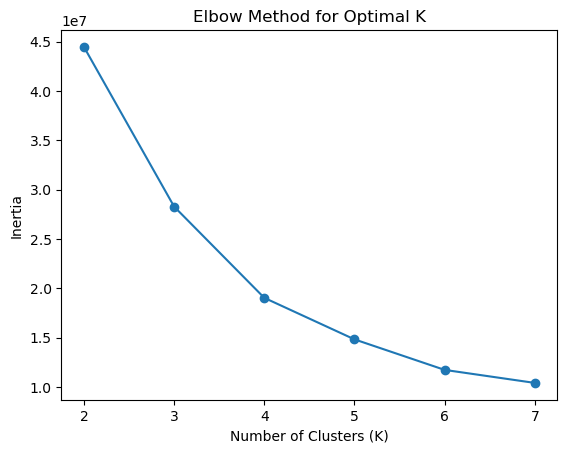

In [10]:
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()


<div style="
    border-left:10px solid #2e7d32;
    padding:10px 14px;color:black; 
    font-size:30px;
    font-weight:800;
    background:#e8f5e9;
">
 Step 3: Apply Clustering (K-Means) </d> 

In [11]:
K = 3
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=K, random_state=42)
labels = kmeans.fit_predict(pixels)


<div style="
    border-left:10px solid #2e7d32;
    padding:10px 14px;color:black; 
    font-size:30px;
    font-weight:800;
    background:#e8f5e9;
">
 Step 4: Reconstruct Segmented Image </d> 

(np.float64(-0.5), np.float64(671.5), np.float64(426.5), np.float64(-0.5))

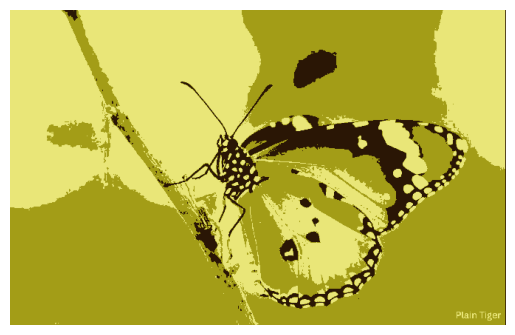

In [12]:
segmented_pixels = kmeans.cluster_centers_[labels]
segmented_image = segmented_pixels.reshape(img.shape)

plt.imshow(segmented_image.astype('uint8'))
plt.axis('off')


<div style="
    border-left:10px solid #2e7d32;
    padding:10px 14px;color:black; 
    font-size:30px;
    font-weight:800;
    background:#e8f5e9;
">
 Step 5: Object Detection After Segmentation </d>  

In [13]:
gray = cv2.cvtColor(segmented_image.astype('uint8'), cv2.COLOR_RGB2GRAY)
contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


<div style="
    border-left:10px solid #2e7d32;
    padding:10px 14px;color:black; 
    font-size:30px;
    font-weight:800;
    background:#e8f5e9;
">
Step 6:Evaluating Segmentation Quality – Silhouette Score </d>  

In [17]:
from sklearn.metrics import silhouette_score
import numpy as np

sample_size = 6000 # safe value
idx = np.random.choice(len(pixels), sample_size, replace=False)

score = silhouette_score(pixels[idx], labels[idx])
print("Silhouette Score:", score)


Silhouette Score: 0.47278297
